Tarea Machine Learning

David Perez Diaz 

_Notas:_

_Debido a la configuracion de mi teclado (English Setup) no tengo acceso a la tecla enye, por lo que cada vez que se necesite una enye se vera sustituida por ny._

### Indice

1. Importacion de librerias necesarias, datos y interpretacion.

2. Exploracion de datos (EDA)

3. Preprocesado

4. Transformacion de variables

5. Modelos

6. Prediccion

In [2]:
import os
import sys
from time import time
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from IPython.display import display
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import scale, StandardScaler, OrdinalEncoder
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline

from NuestrasFunciones import *

(CVXPY) Jan 18 11:59:43 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Jan 18 11:59:43 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.8.3296). Expected < 9.8.0. Please open a feature request on cvxpy to enable support for this version.')


In [4]:
data_train = pd.read_csv('archive/fraudTrain.csv', index_col=0)
data_test = pd.read_csv('archive/fraudTest.csv', index_col=0)

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [7]:
data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
data_train.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [9]:
categorizer(data_train)
categorizer(data_test)

array([[<Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'zip'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>],
       [<Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>]], dtype=object)

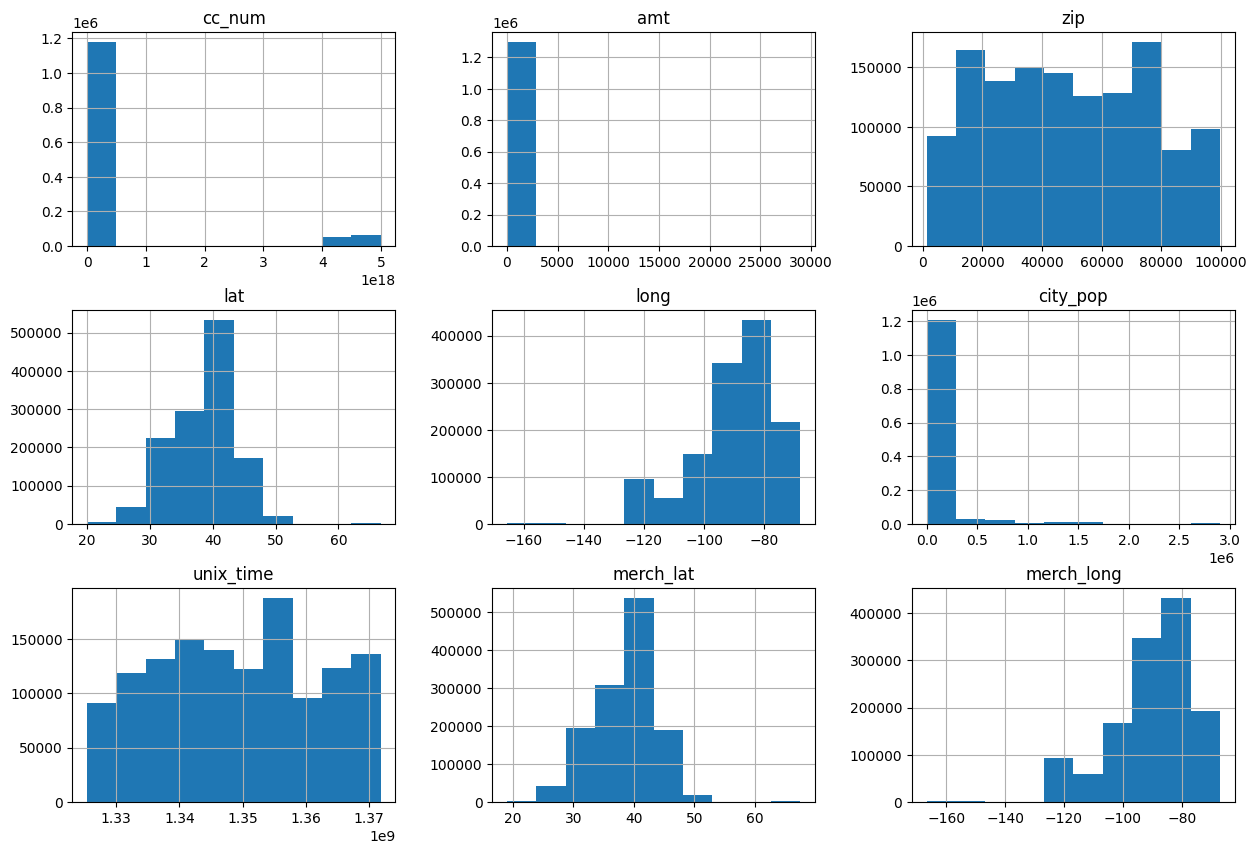

In [10]:
data_train.select_dtypes(include=np.number).hist(figsize=(15,10))

,Counts,Percentage
is_fraud,,
0,1289169,99.42
1,7506,0.58


<Axes: xlabel='is_fraud'>

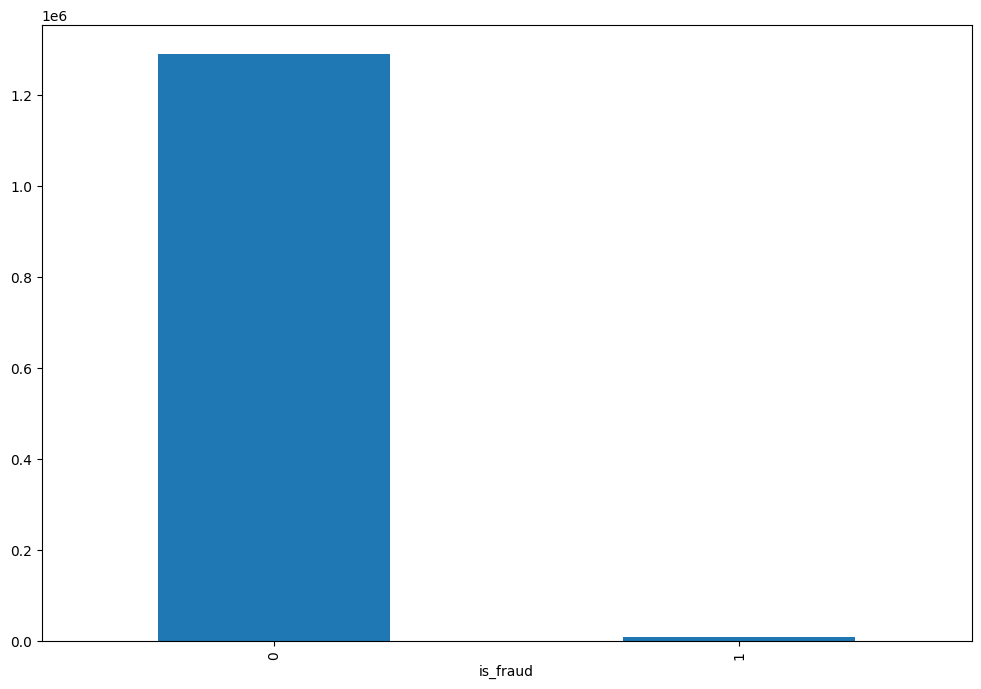

In [11]:
display(pd.DataFrame({'Counts': data_train['is_fraud'].value_counts(),
                    'Percentage': (data_train['is_fraud'].value_counts()/len(data_train)*100).round(2)}))

pd.value_counts(data_train['is_fraud']).plot.bar()

,Counts,Percentage
is_fraud,,
0,553574,99.61
1,2145,0.39


<Axes: xlabel='is_fraud'>

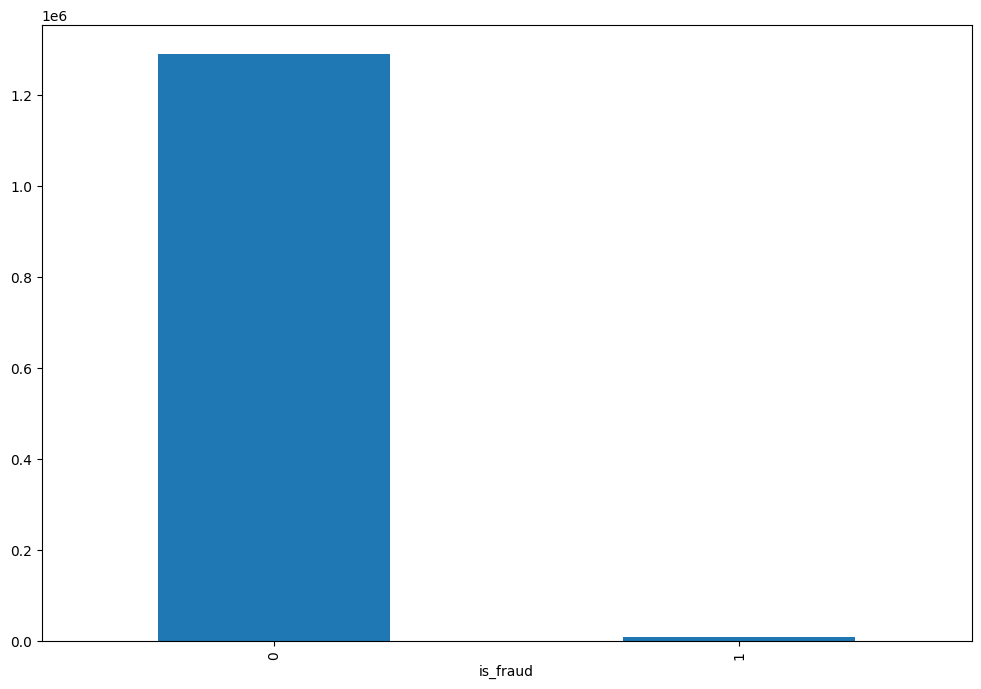

In [12]:
display(pd.DataFrame({'Counts': data_test['is_fraud'].value_counts(),
                    'Percentage': (data_test['is_fraud'].value_counts()/len(data_test)*100).round(2)}))

pd.value_counts(data_train['is_fraud']).plot.bar()

In [13]:
data_train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01


In [14]:
data_train.describe(exclude=np.number)

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,is_fraud
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,1274791,693,14,352,481,2,983,894,51,494,968,1296675,2
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,0069 Robin Brooks Apt. 695,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,0
freq,4,4403,131659,26669,28794,709863,3123,5617,94876,9779,5636,1,1289169


<Axes: xlabel='amt', ylabel='Density'>

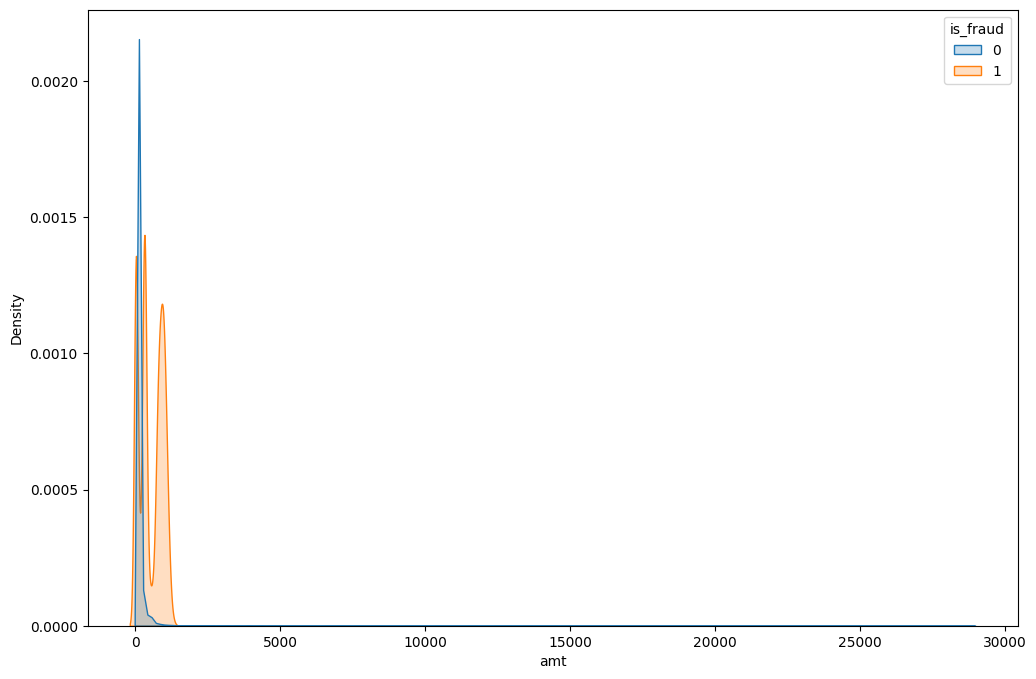

In [15]:
sns.kdeplot(data=data_train, x='amt', hue=data_train['is_fraud'], fill=True, common_norm=False)

<Axes: ylabel='amt'>

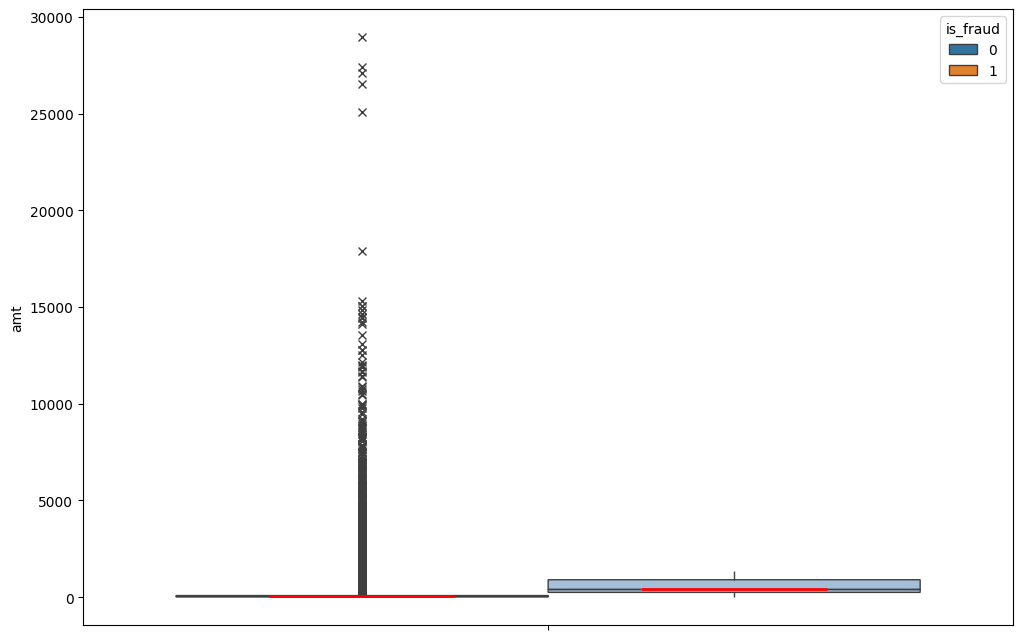

In [16]:
sns.boxplot(
    data=data_train, y="amt", hue="is_fraud",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

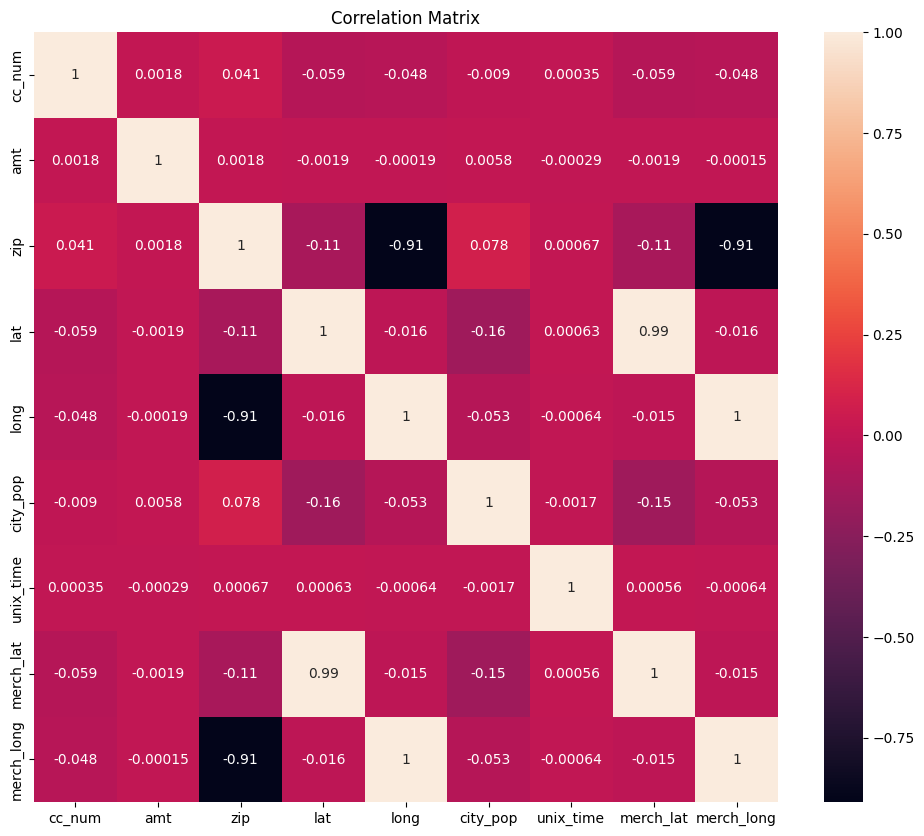

In [17]:
corr_matrix = data_train.select_dtypes(include=np.number).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

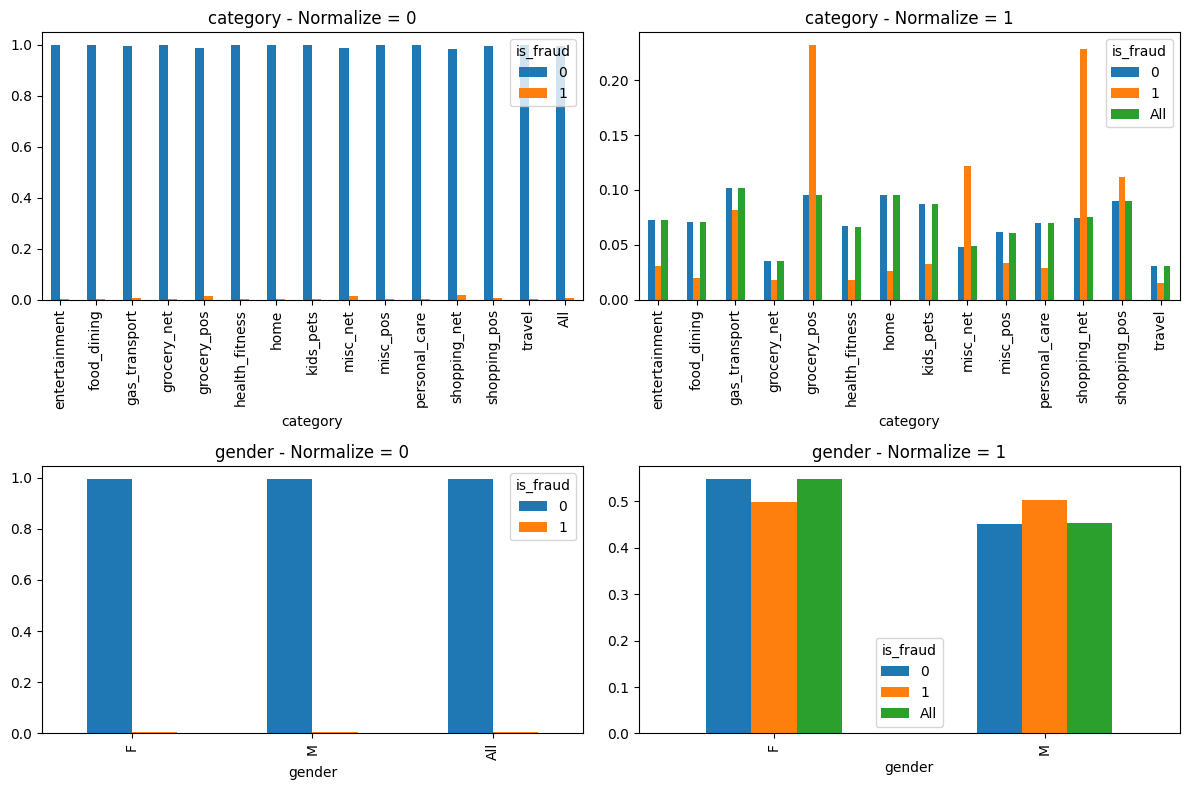

In [18]:
mask = data_train.nunique() < 20
data_cat = data_train.loc[:,mask].drop(columns='is_fraud')
fig, axes = plt.subplots(nrows=len(data_cat.columns), ncols=2)
for index, column in enumerate(data_cat.columns):
    crosstab_n1 = pd.crosstab(data_cat[column], data_train['is_fraud'], margins=True, normalize=1).round(3)
    crosstab_n0 = pd.crosstab(data_cat[column], data_train['is_fraud'], margins=True, normalize=0).round(3)
    crosstab_n0.plot(kind='bar', ax=axes[index, 0])
    axes[index, 0].set_title(f"{column} - Normalize = 0")
    crosstab_n1.plot(kind='bar', ax=axes[index, 1])
    axes[index, 1].set_title(f"{column} - Normalize = 1")
plt.tight_layout()
plt.show()

In [19]:
data_train['trasaction_hour'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.hour
data_train['trasaction_day'] = pd.to_datetime(data_train['trans_date_trans_time']).dt.dayofweek
data_train['dob'] = pd.to_datetime(data_train['dob'])
data_train['trans_date_trans_time'] = pd.to_datetime(data_train['trans_date_trans_time'])
data_train['age'] = (data_train['trans_date_trans_time'] - data_train['dob']).dt.days // 365

In [20]:
data_test['trasaction_hour'] = pd.to_datetime(data_test['trans_date_trans_time']).dt.hour
data_test['trasaction_day'] = pd.to_datetime(data_test['trans_date_trans_time']).dt.dayofweek
data_test['dob'] = pd.to_datetime(data_test['dob'])
data_test['trans_date_trans_time'] = pd.to_datetime(data_test['trans_date_trans_time'])
data_test['age'] = (data_train['trans_date_trans_time'] - data_test['dob']).dt.days // 365

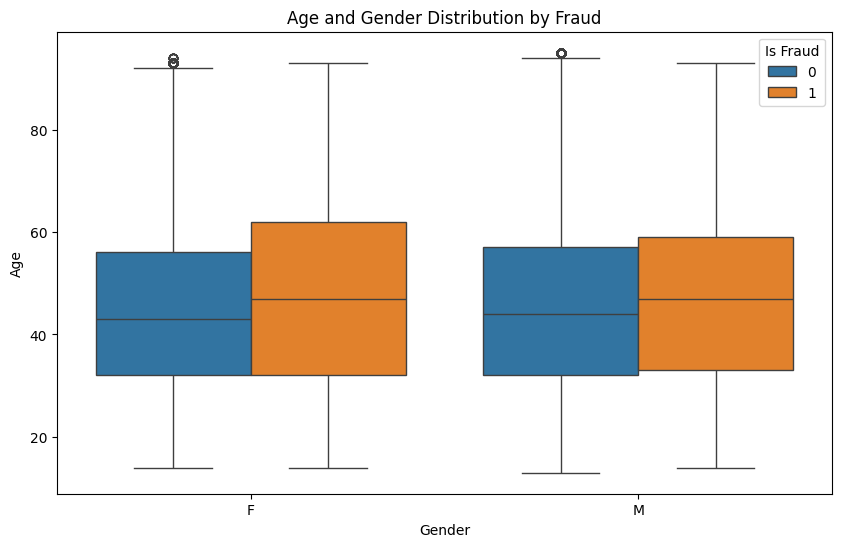

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='age', hue='is_fraud', data=data_train)
plt.title('Age and Gender Distribution by Fraud')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Is Fraud')
plt.show()

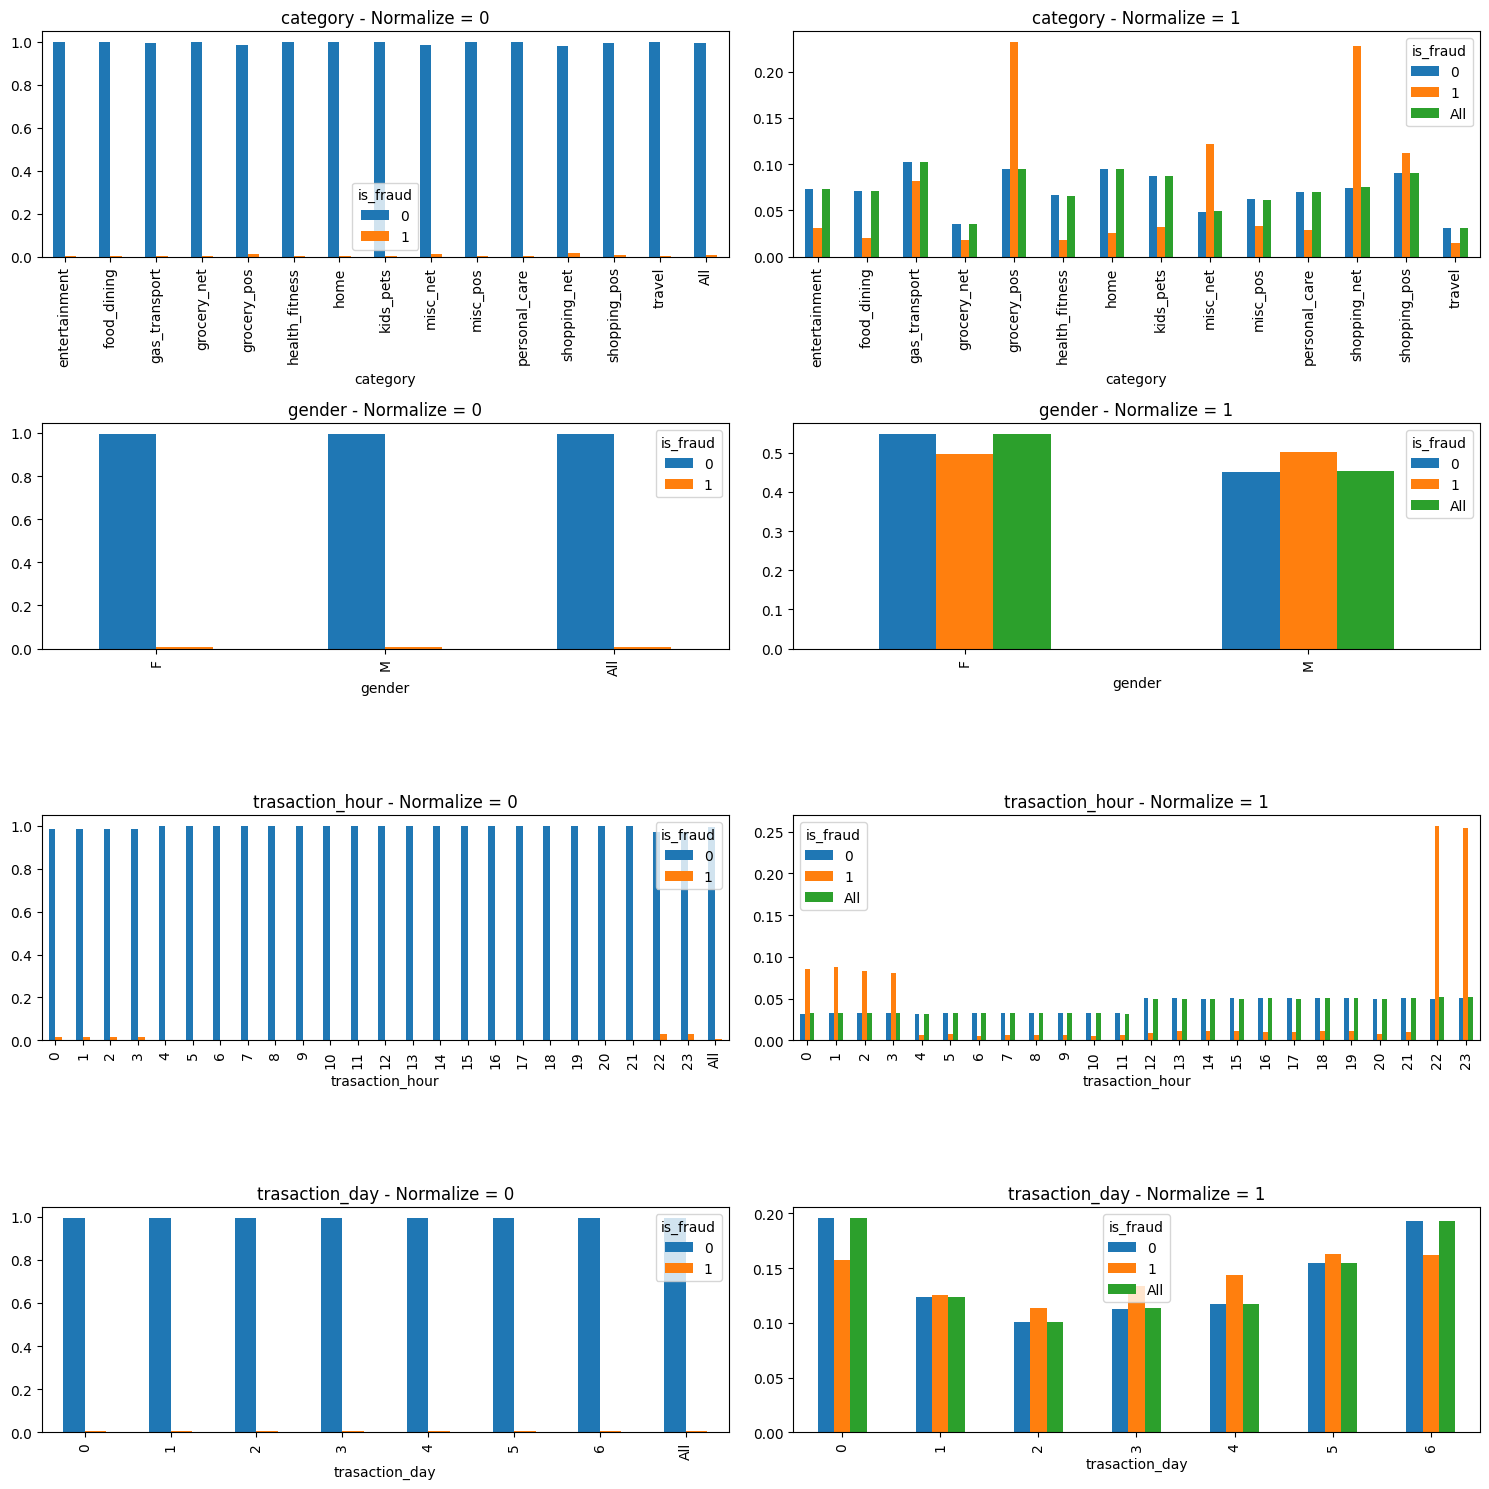

In [22]:
mask = data_train.nunique() <= 30 
data_cat = data_train.loc[:,mask].drop(columns='is_fraud')
fig, axes = plt.subplots(nrows=len(data_cat.columns), ncols=2, figsize=(15, 15))
for index, column in enumerate(data_cat.columns):
    crosstab_n1 = pd.crosstab(data_cat[column], data_train['is_fraud'], margins=True, normalize=1).round(3)
    crosstab_n0 = pd.crosstab(data_cat[column], data_train['is_fraud'], margins=True, normalize=0).round(3)
    crosstab_n0.plot(kind='bar', ax=axes[index, 0])
    axes[index, 0].set_title(f"{column} - Normalize = 0")
    crosstab_n1.plot(kind='bar', ax=axes[index, 1])
    axes[index, 1].set_title(f"{column} - Normalize = 1")
plt.tight_layout()
plt.show()

In [23]:
from optbinning import OptimalBinning

In [24]:
variable = "age"
x = data_train[variable].values
y = data_train['is_fraud']

In [25]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [26]:
optb.fit(x, y)

OptimalBinning(name='age')

In [27]:
binning_table = optb.binning_table
df = binning_table.build()
df.sort_values(by="Event rate",ascending=False)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
8,"[76.50, inf)",85729,0.066114,84930,799,0.009320,-0.479829,0.019466,0.002410
7,"[55.50, 76.50)",257047,0.198235,255224,1823,0.007092,-0.204392,0.009177,0.001145
6,"[48.50, 55.50)",138665,0.106939,137736,929,0.006700,-0.147065,0.002489,0.000311
0,"(-inf, 26.50)",170221,0.131275,169156,1065,0.006257,-0.078204,0.000835,0.000104
Totals,,1296675,1.000000,1289169,7506,0.005789,,0.066185,0.008223
1,"[26.50, 29.50)",73252,0.056492,72871,381,0.005201,0.107596,0.000620,0.000078
5,"[44.50, 48.50)",133866,0.103238,133219,647,0.004833,0.181353,0.003108,0.000388
2,"[29.50, 33.50)",126243,0.097359,125670,573,0.004539,0.244479,0.005169,0.000645
4,"[36.50, 44.50)",214382,0.165332,213438,944,0.004403,0.274925,0.010941,0.001363
3,"[33.50, 36.50)",97270,0.075015,96925,345,0.003547,0.492098,0.014380,0.001780


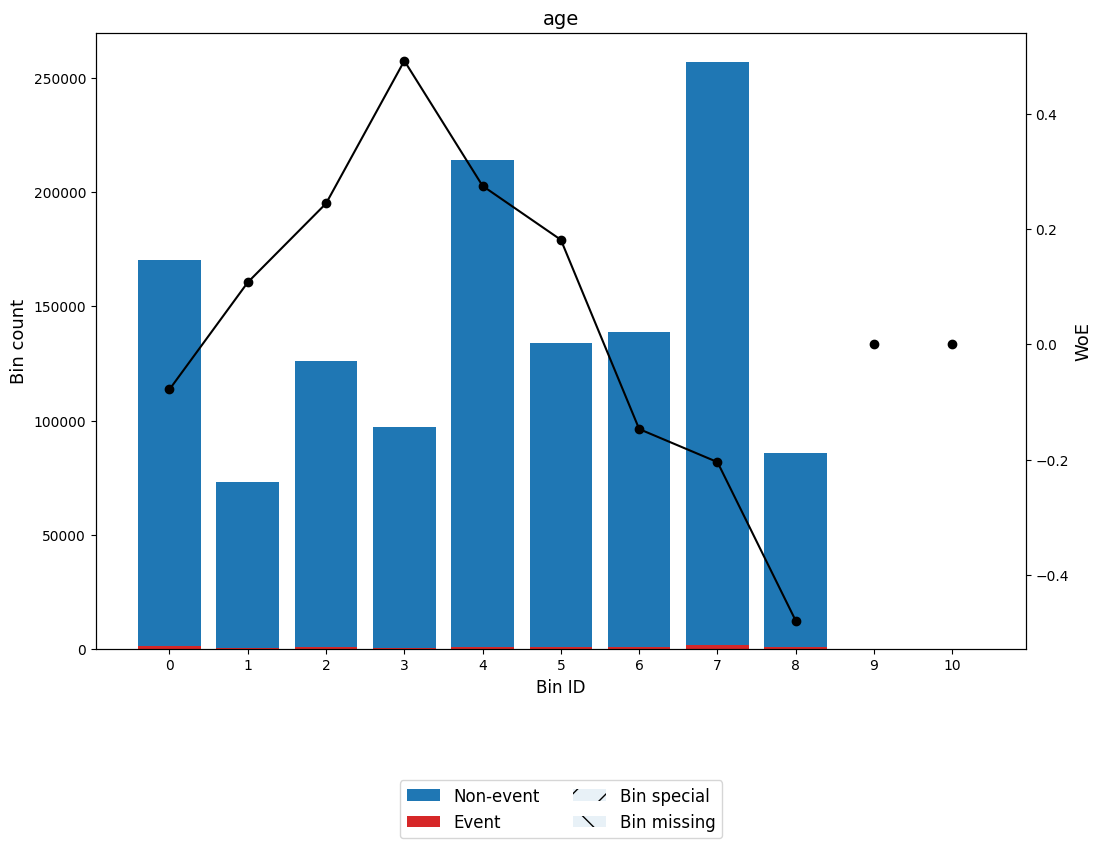

In [28]:
binning_table.plot(metric="woe")

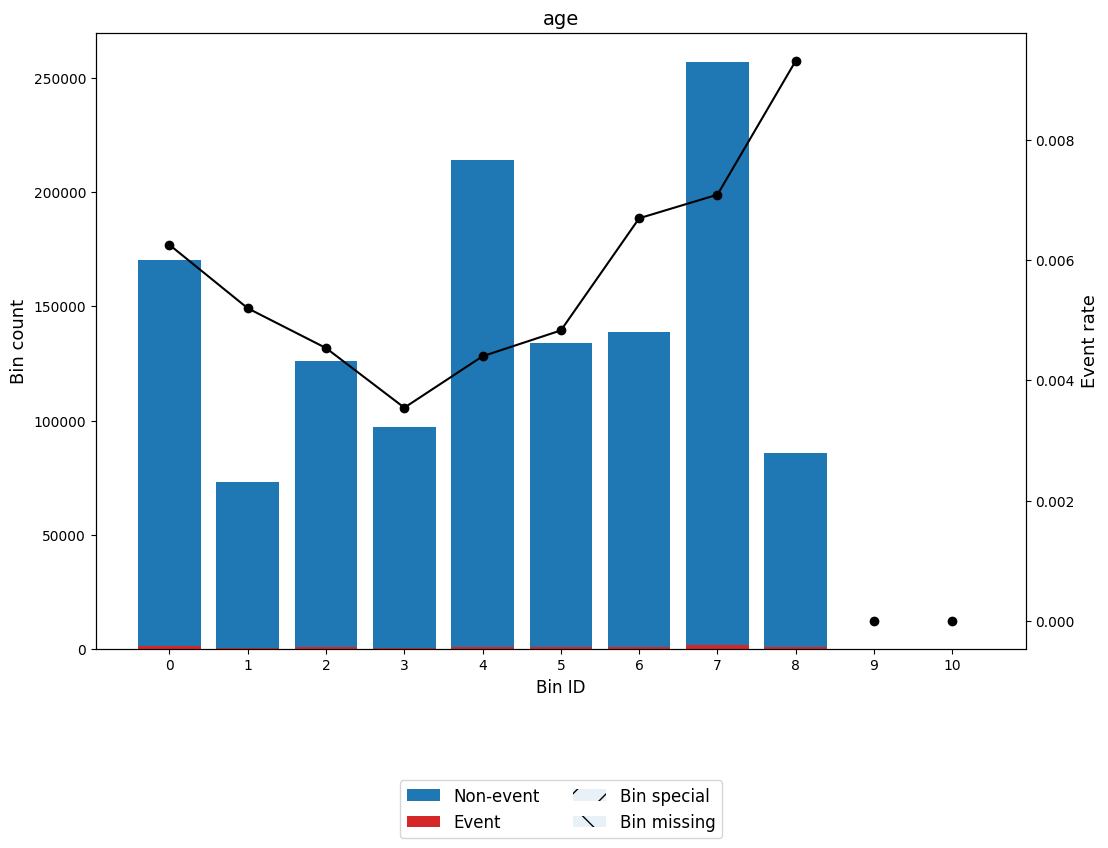

In [29]:
binning_table.plot(metric="event_rate")

In [30]:
data_train['age_binned'] = optb.transform(x, metric="bins")
data_test['age_binned'] = optb.transform(data_test[variable], metric='bins')

In [31]:
variable = 'amt'
x = data_train[variable]
y = data_train['is_fraud']

In [32]:
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")

In [33]:
optb.fit(x,y)

OptimalBinning(name='amt')

In [34]:
binning_table = optb.binning_table
df = binning_table.build()
df.sort_values(by="Event rate",ascending=False)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
5,"[196.31, inf)",64835,0.050001,59130,5705,0.087993,-2.807655,2.005204,0.191312
Totals,,1296675,1.000000,1289169,7506,0.005789,,4.253053,0.363758
0,"(-inf, 24.27)",457844,0.353091,456299,1545,0.003375,0.542074,0.080288,0.009915
4,"[103.55, 196.31)",155637,0.120028,155492,145,0.000932,1.831565,0.185531,0.020412
1,"[24.27, 52.45)",238579,0.183993,238480,99,0.000415,2.64087,0.453696,0.044443
3,"[59.17, 103.55)",314847,0.242811,314837,10,0.000032,5.211175,1.265715,0.080962
2,"[52.45, 59.17)",64933,0.050077,64931,2,0.000031,5.241883,0.262619,0.016716
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [35]:
data_train['amt_binned'] = optb.transform(x, metric='bins')
data_test['amt_binned'] = optb.transform(data_test[variable], metric='bins')

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [37]:
numerical_cols = ['amt', 'lat', 'long','city_pop', 'unix_time', 'merch_lat', 'merch_long']
categorical_cols = ['gender', 'category', 'age_binned','amt_binned']
time_colms = ["trasaction_hour","trasaction_day"]

In [38]:
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_train_features = encoder.fit_transform(data_train[categorical_cols]).toarray()
encoded_test_features = encoder.transform(data_test[categorical_cols]).toarray()

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(data_train[numerical_cols])
scaled_test_features = scaler.transform(data_test[numerical_cols])

In [39]:
final_train_features = pd.concat([pd.DataFrame(encoded_train_features), 
                                  pd.DataFrame(scaled_train_features), 
                                  pd.DataFrame(data_train[time_colms].values)], axis=1)

final_test_features = pd.concat([pd.DataFrame(encoded_test_features), 
                                 pd.DataFrame(scaled_test_features), 
                                 pd.DataFrame(data_test[time_colms].values)], axis=1)


In [40]:
X_test = final_test_features
y_train = data_train['is_fraud']
y_test = data_test['is_fraud']

In [41]:
smote = SMOTE(random_state=36)

X_train, y_train = smote.fit_resample(final_train_features, y_train)

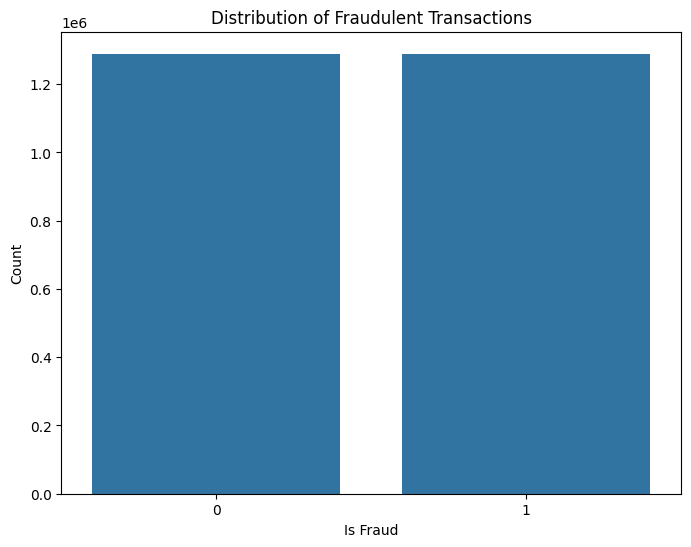

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

In [43]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [44]:
lg_predictions = lg_model.predict(X_test)
lg_accuracy = accuracy_score(y_test, lg_predictions)
print("Logistic Regression Accuracy: {:.3f}%".format(lg_accuracy * 100))

Logistic Regression Accuracy: 95.025%


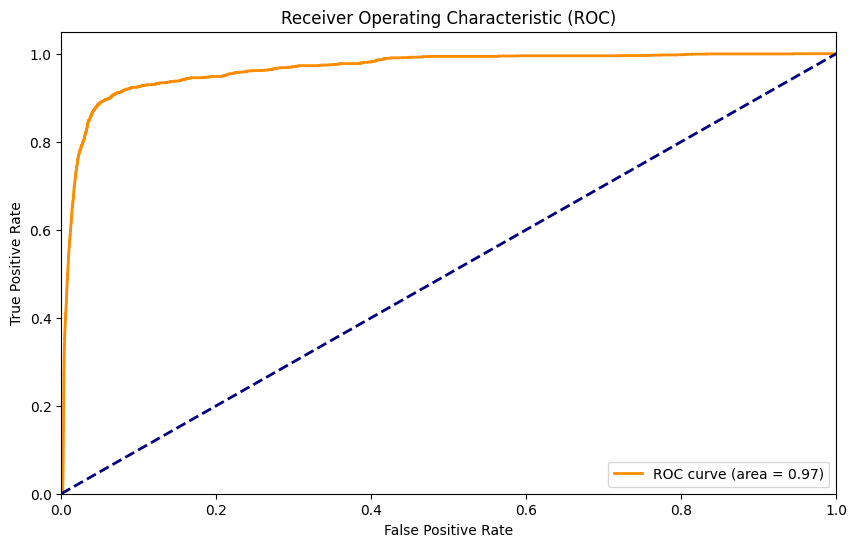

In [45]:
# Calculate ROC curve and AUC
probs = lg_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

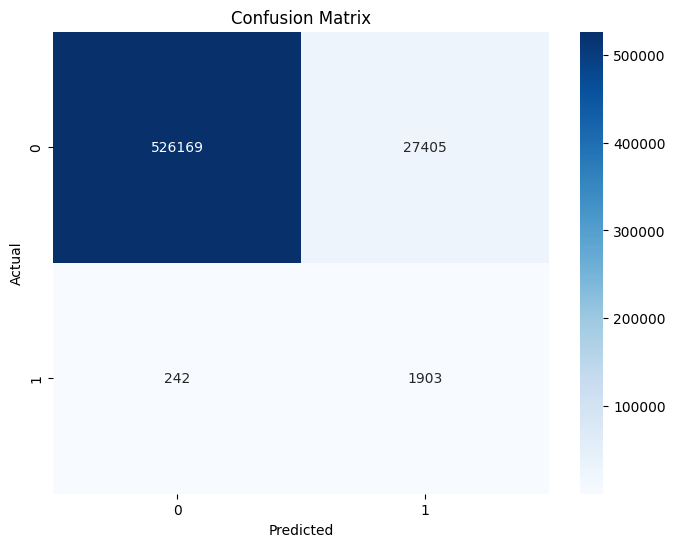

In [46]:
conf_matrix = confusion_matrix(y_test, lg_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [47]:
from sklearn.ensemble import ExtraTreesClassifier

# Train Extra Trees model
extra_trees_model = ExtraTreesClassifier(random_state=42)
extra_trees_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [48]:
ext_predictions = extra_trees_model.predict(X_test)
ext_accuracy = accuracy_score(y_test, ext_predictions)
print("Extra Tree Accuracy: {:.3f}%".format(ext_accuracy * 100))

Extra Tree Accuracy: 99.861%


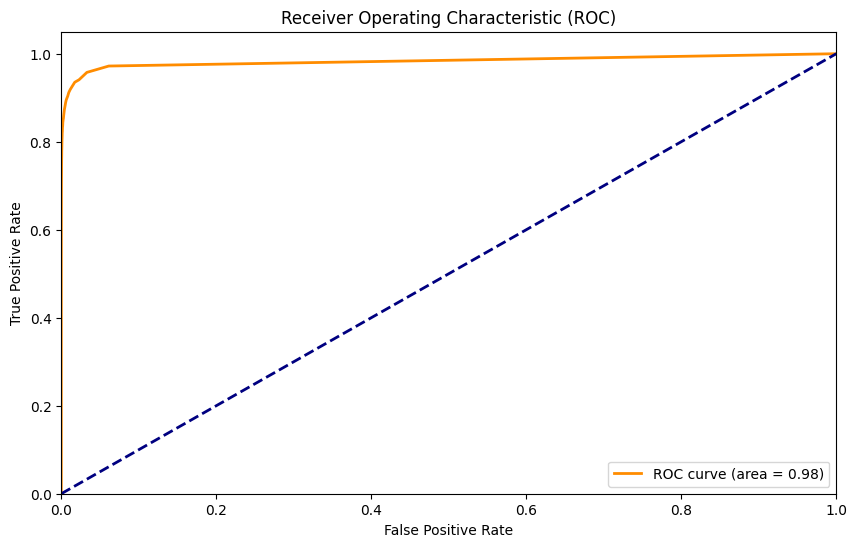

In [49]:
# Calculate ROC curve and AUC
probs = extra_trees_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

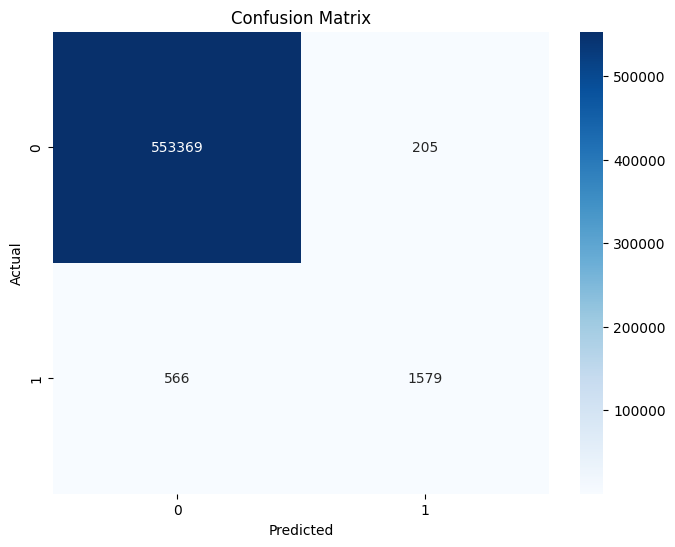

In [50]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, ext_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
rf_predictions = rf_model.predict(X_test)

# Calculate evaluation metrics on test data
rf_accuracy = accuracy_score(y_test, rf_predictions)


# Print evaluation metrics with 3 decimal places, multiplied by 100
print("Random Forest Accuracy: {:.3f}%".format(rf_accuracy * 100))

Random Forest Accuracy: 99.872%


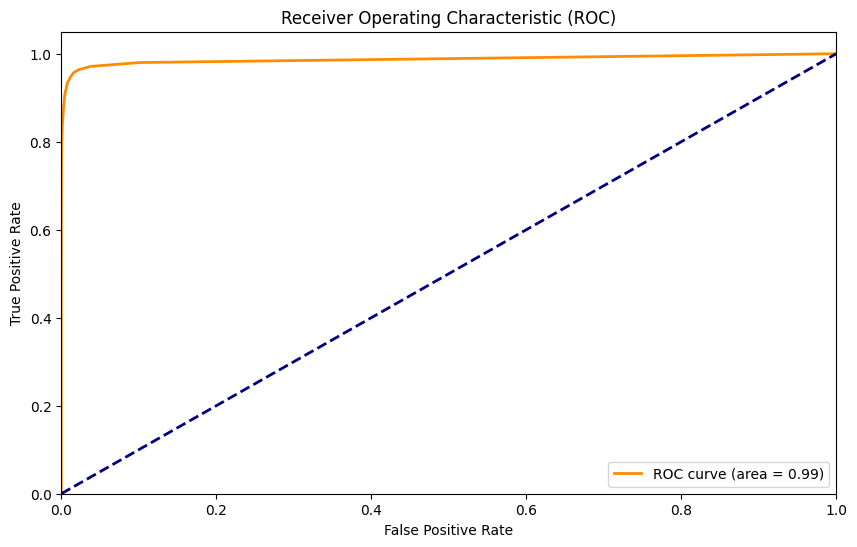

In [55]:
# Calculate ROC curve and AUC
probs = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

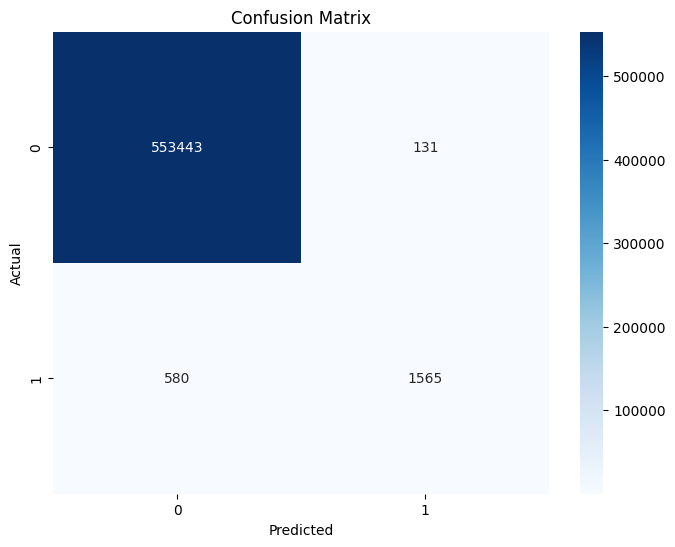

In [56]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
import pandas as pd

model_names = ['Logistic Regression', 'Extra Trees', 'Randam Forest']
model_instances = [lg_model, extra_trees_model, rf_model]

# Assuming X_test and y_test are your test data and labels

# Initialize lists to store accuracy and ROC scores
accuracy_scores = []
roc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []

# Calculate accuracy and ROC scores for each model
for model in model_instances:
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    roc_score = roc_auc_score(y_test, predictions)
    accuracy_scores.append(accuracy)
    roc_scores.append(roc_score)
    f1_scores.append(f1_score(y_test, predictions))
    precision_scores.append(precision_score(y_test, predictions))
    recall_scores.append(recall_score(y_test, predictions))

# Create a DataFrame to compare results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'ROC Score': roc_scores,
    'F1 Score': f1_scores,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
})
results_df

,Model,Accuracy,ROC Score,F1 Score,Precision Score,Recall Score
0,Logistic Regression,0.950250,0.918837,0.121006,0.064931,0.887179
1,Extra Trees,0.998613,0.867880,0.803767,0.885090,0.736131
2,Randam Forest,0.998721,0.864684,0.814892,0.922759,0.729604
